# Participant data analysis - Boston Marathon 2016

In [1]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
plt.rc('figure',figsize=(16,9)) 
plt.rc('font', size=15)

- Bib - numer startowy na podstawie czasu kwalifikacyjnego
- Official Time - czas pokonania maratonu
- Half - czas na półmetku
- Pace - tempo biegacza (min/mila)

In [3]:
df = pd.read_csv(
    'C:/Users/Marta/Desktop/PythonScripts/Python-data-science/course-files/marathon_results_2016.csv', 
    index_col='Bib', 
    usecols=['Bib','Official Time','Half','Pace','Age','M/F','Country', 'State','City']
).rename(columns={'M/F':'Sex'}).sort_index()

df['Official Time'] = df['Official Time'].replace('-', 0)
df['Half'] = df['Half'].replace('-', 0)
 
df['Official Time'] = df['Official Time'].apply(pd.to_timedelta)
df['Half'] = df['Half'].apply(pd.to_timedelta)
 
df['TotalSeconds'] = df['Official Time'].apply(lambda x: timedelta.total_seconds(x))
df['HalfSeconds'] = df['Half'].apply(lambda x: timedelta.total_seconds(x))
 
df['TotalSeconds'] = df['TotalSeconds'].replace(0,np.nan)
df['HalfSeconds'] = df['HalfSeconds'].replace(0,np.nan)

df.head()

,Age,Sex,City,State,Country,Half,Pace,Official Time,TotalSeconds,HalfSeconds
Bib,,,,,,,,,,
1,26,M,Ambo,NaN,ETH,0 days 01:06:46,0:05:06,0 days 02:13:32,8012.0,4006.0
1000,27,M,Tinley Park,IL,USA,0 days 01:24:40,0:07:10,0 days 03:07:33,11253.0,5080.0
10001,32,F,Boston,MA,USA,0 days 02:36:00,0:13:11,0 days 05:45:28,20728.0,9360.0
10002,51,M,Cary,NC,USA,0 days 01:40:37,0:07:55,0 days 03:27:18,12438.0,6037.0
10003,48,M,Johnston,RI,USA,0 days 01:40:28,0:08:11,0 days 03:34:33,12873.0,6028.0


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 26630 entries, 1 to F9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Age            26630 non-null  int64          
 1   Sex            26630 non-null  object         
 2   City           26629 non-null  object         
 3   State          23783 non-null  object         
 4   Country        26630 non-null  object         
 5   Half           26630 non-null  timedelta64[ns]
 6   Pace           26630 non-null  object         
 7   Official Time  26630 non-null  timedelta64[ns]
 8   TotalSeconds   26630 non-null  float64        
 9   HalfSeconds    26613 non-null  float64        
dtypes: float64(2), int64(1), object(5), timedelta64[ns](2)
memory usage: 10.3 MB


In [5]:
df['Pace'].nunique() / len(df['Pace'])

0.020503191888847166

In [6]:
df['Sex'] = df['Sex'].astype('category')
df['City'] = df['City'].astype('category')
df['State'] = df['State'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Pace'] = df['Pace'].astype('category')

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 26630 entries, 1 to F9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Age            26630 non-null  int64          
 1   Sex            26630 non-null  category       
 2   City           26629 non-null  category       
 3   State          23783 non-null  category       
 4   Country        26630 non-null  category       
 5   Half           26630 non-null  timedelta64[ns]
 6   Pace           26630 non-null  category       
 7   Official Time  26630 non-null  timedelta64[ns]
 8   TotalSeconds   26630 non-null  float64        
 9   HalfSeconds    26613 non-null  float64        
dtypes: category(5), float64(2), int64(1), timedelta64[ns](2)
memory usage: 3.3 MB


------------------------------------------------------------------------------------------------------------------------------

## Run time analysis depending on gender and age

In [8]:
age = df.groupby(['Age'])

NumberOfPeople = age['TotalSeconds'].count().to_frame().rename(columns={'TotalSeconds':'All People'})
NumberOfPeople.sort_values('All People', ascending=False).head()

,All People
Age,
45,1074
46,1030
40,904
47,869
41,851


In [9]:
women = df[df['Sex'] == 'F']
men = df[df['Sex'] == 'M']

sex_age_women = women.groupby('Age')
sex_age_men = men.groupby('Age')

NumberOfWomen = sex_age_women['TotalSeconds'].count().to_frame().rename(columns={'TotalSeconds':'Women'})
NumberOfMen = sex_age_men['TotalSeconds'].count().to_frame().rename(columns={'TotalSeconds':'Men'})

In [10]:
all_mean = format(df['Age'].mean(), '.1f')
women_mean = format(women['Age'].mean(), '.1f')
men_mean = format(men['Age'].mean(), '.1f')

In [11]:
oldest = NumberOfPeople['All People'].loc[83]
youngest = NumberOfPeople['All People'].loc[18]

oldest_women = NumberOfWomen['Women'].loc[83]
oldest_men = NumberOfMen['Men'].loc[83]

youngest_women = NumberOfWomen['Women'].loc[18]
youngest_men = NumberOfMen['Men'].loc[18]

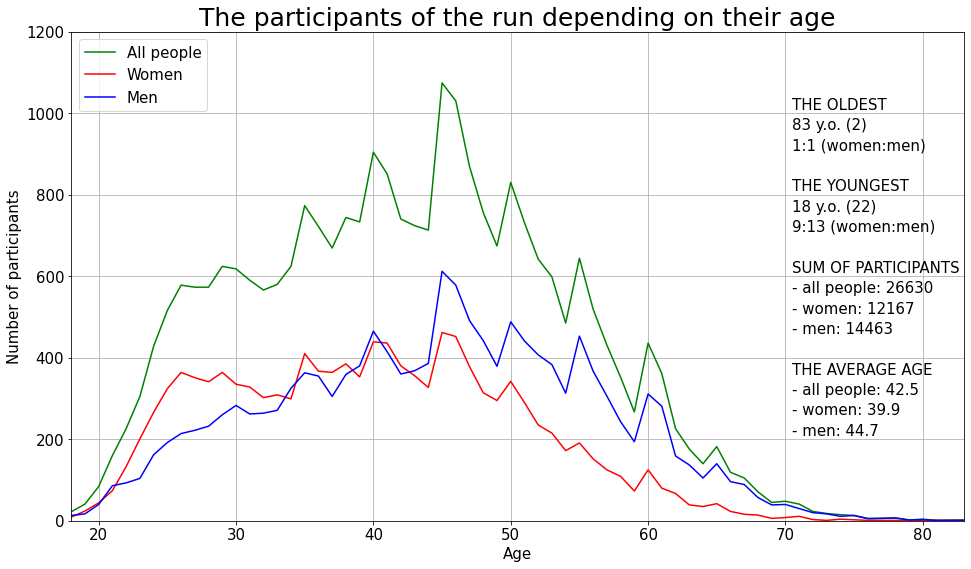

In [12]:
plt.xlim([18,83])
plt.ylim([0, 1200])

plt.title('The participants of the run depending on their age', fontsize=25)
plt.ylabel('Number of participants')
plt.xlabel('Age')

plt.plot(NumberOfPeople, color='green', label='All people')
plt.plot(NumberOfWomen, color='red', label='Women')
plt.plot(NumberOfMen, color='blue', label='Men')

plt.text(70.5, 1010, 'THE OLDEST')
plt.text(70.5, 960, f'83 y.o. ({oldest})')
plt.text(70.5, 910, f'{oldest_women}:{oldest_men} (women:men)')

plt.text(70.5, 810, 'THE YOUNGEST')
plt.text(70.5, 760, f'18 y.o. ({youngest})')
plt.text(70.5, 710, f'{youngest_women}:{youngest_men} (women:men)')

plt.text(70.5, 610, 'SUM OF PARTICIPANTS')
plt.text(70.5, 560, f'- all people: {int(len(women)) + int(len(men))}')
plt.text(70.5, 510, f'- women: {len(women)}')
plt.text(70.5, 460, f'- men: {len(men)}')

plt.text(70.5, 360, 'THE AVERAGE AGE')
plt.text(70.5, 310, f'- all people: {all_mean}')
plt.text(70.5, 260, f'- women: {women_mean}')
plt.text(70.5, 210, f'- men: {men_mean}')

plt.grid()
plt.legend(loc='upper left');

-------------------------------------------------------------------------------------------------------------------------------

## Time analysis

In [13]:
time_all = df.groupby('Country')
time_women = women.groupby('Country')
time_men = men.groupby('Country')

mean_time_all = time_all['TotalSeconds'].mean().sort_index()
mean_time_women = time_women['TotalSeconds'].mean().fillna(0).sort_index()
mean_time_men = time_men['TotalSeconds'].mean().fillna(0).sort_index()

max_time_women = time_women['TotalSeconds'].min().fillna(0)
max_time_men = time_men['TotalSeconds'].min().fillna(0)

In [14]:
def plot_marathon_time(start:int, end:int) -> None:
    
    """
    Choose how many countries are to be shown on the chart (values from 0 to 79).
    """
    
    plt.ylim([5000,23000])

    ax = mean_time_women.index[start:end]
    ay = mean_time_women.values[start:end]

    bx = mean_time_men.index[start:end]
    by = mean_time_men.values[start:end]

    cx = max_time_women.index[start:end]
    cy = max_time_women.values[start:end]

    dx = max_time_men.index[start:end]
    dy = max_time_men.values[start:end]

    plt.title("The time to complete the runner's marathon by country", fontsize=25)
    plt.xlabel('Countries')
    plt.ylabel('Total time in seconds')
    
    plt.plot(cx, cy, 'ro', label='The fastest women')
    plt.plot(dx, dy, 'bo', label='The fastest men')

    plt.plot(ax, ay, 'r*', label='Mean women')
    plt.plot(bx, by, 'b*', label='Mean men')
   
    plt.grid()
    plt.legend()
    plt.show()

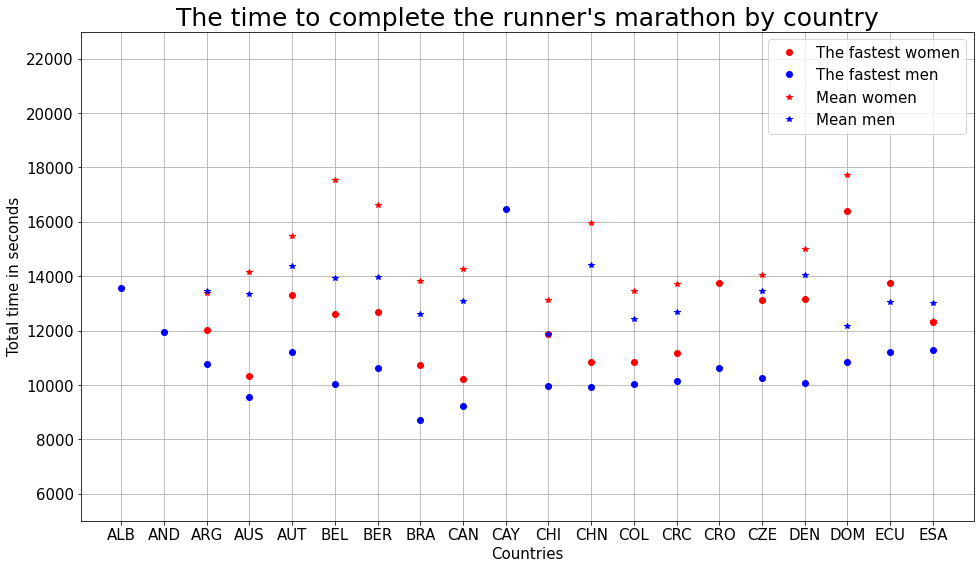

In [15]:
plot_marathon_time(0,20)

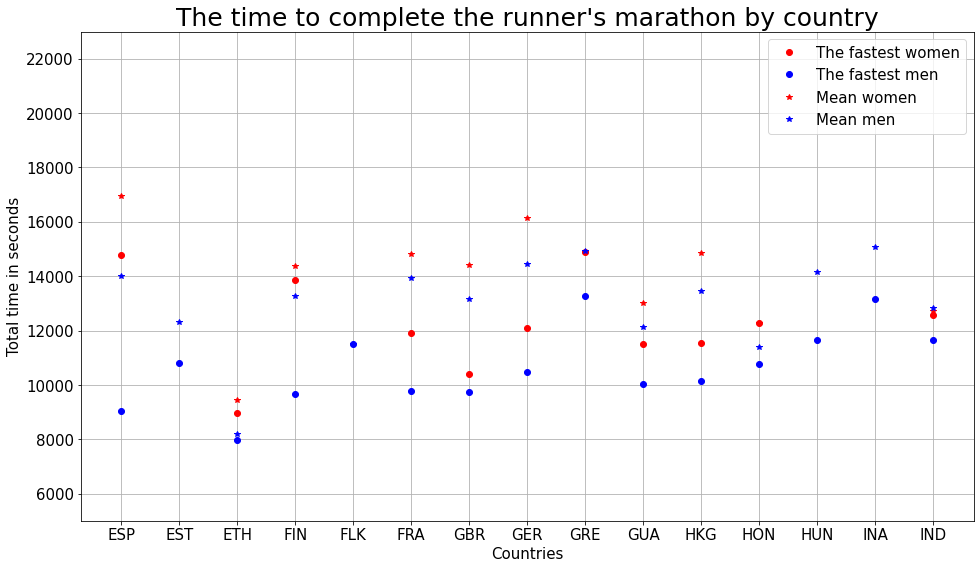

In [16]:
plot_marathon_time(20,35)

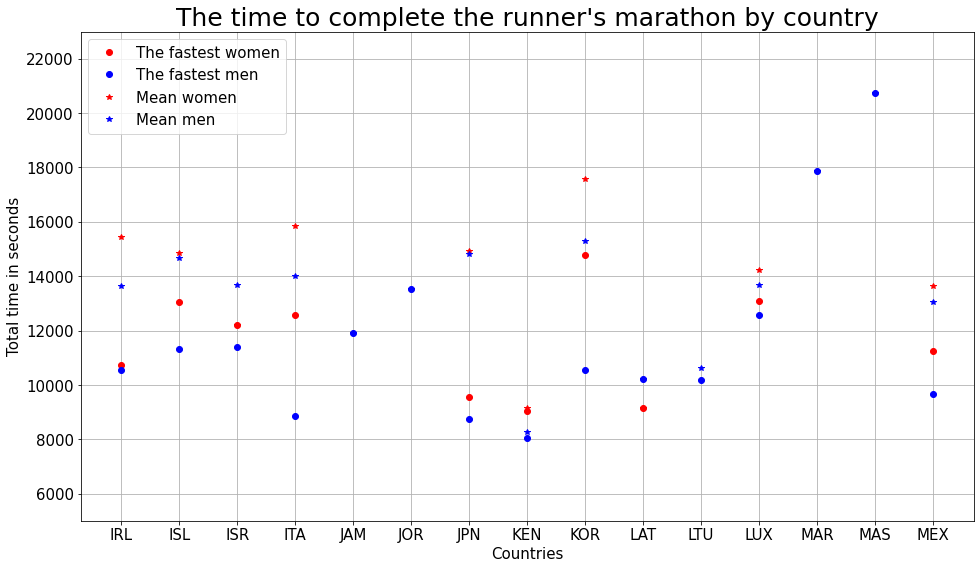

In [17]:
plot_marathon_time(35,50)

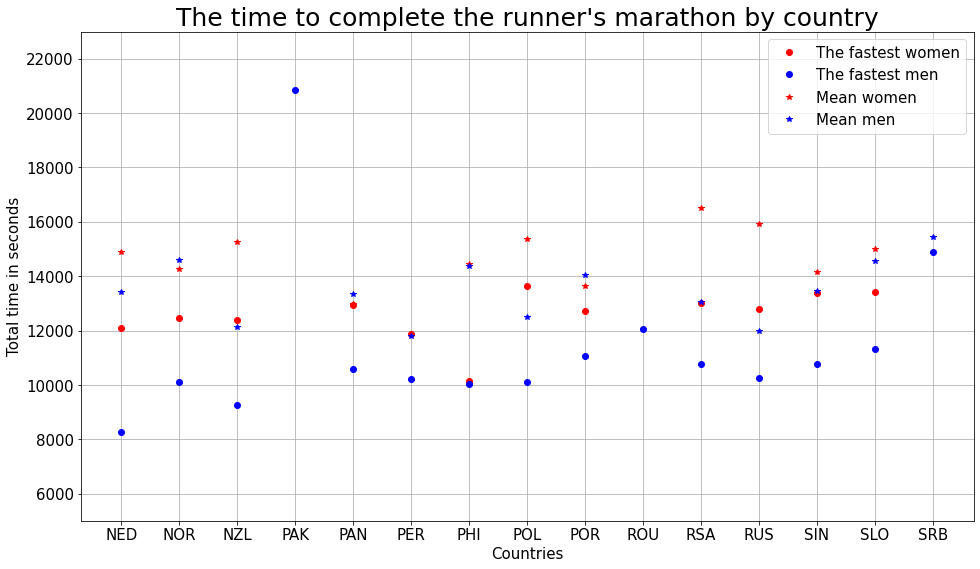

In [18]:
plot_marathon_time(50,65)

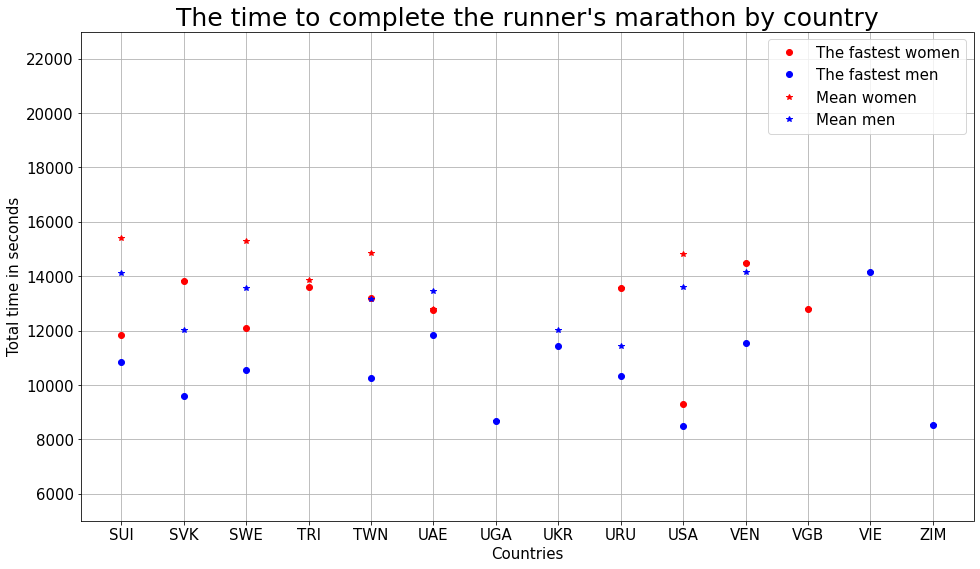

In [19]:
plot_marathon_time(65,80)

--------------------------------------------------------------------------------------------------------------------------------

## Poland - analysis

In [20]:
poland = df[df['Country'] == 'POL']

del poland['State']
del poland['Country']

poland['City'].unique()

['Warszawa', 'Szczecin', 'Warsaw', 'Wroclaw', 'Tarnow', ..., 'Bydgoszcz', 'Tarnowo', 'Ustron', 'Zabrze', 'Bierzglinek']
Length: 11
Categories (5832, object): ['0851 Oslo', '20832', '34-120 Andrychow', '5700 Svendborg', ..., 'Zweibruecken', 'Zwevegem', 'Zwolle', 'hingham']

In [21]:
def remove_special_char(city):
    new_city = ''
    for char in city:
        if not char.isalpha():
            new_city += char.replace(char, '')
        else:
            new_city += char
    
    return new_city
        

def change_warsaw_to_warszawa(city):
    new_city = ''
    if city == 'Warsaw':
        new_city = 'Warszawa'
    else:
        new_city = city
    
    return new_city

In [22]:
poland['City'] = poland['City'].map(lambda x: remove_special_char(x)) 
poland['City'] = poland['City'].map(lambda x: change_warsaw_to_warszawa(x))
poland.sample(5)

C:\Users\Marta\AppData\Local\Temp\ipykernel_2024\884396537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poland['City'] = poland['City'].map(lambda x: remove_special_char(x))
C:\Users\Marta\AppData\Local\Temp\ipykernel_2024\884396537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poland['City'] = poland['City'].map(lambda x: change_warsaw_to_warszawa(x))


,Age,Sex,City,Half,Pace,Official Time,TotalSeconds,HalfSeconds
Bib,,,,,,,,
13634,52,M,Warszawa,0 days 01:46:06,0:08:54,0 days 03:53:04,13984.0,6366.0
15215,58,M,Wroclaw,0 days 01:45:42,0:08:48,0 days 03:50:35,13835.0,6342.0
4296,40,M,Tarnowo,0 days 01:28:15,0:07:40,0 days 03:20:49,12049.0,5295.0
31786,44,F,Andrychow,0 days 01:58:39,0:09:28,0 days 04:07:48,14868.0,7119.0
18091,43,F,Warszawa,0 days 01:46:47,0:09:09,0 days 03:59:35,14375.0,6407.0


In [23]:
poland.reset_index(inplace=True)

In [24]:
poland_women = poland[poland['Sex'] == 'F']
poland_men = poland[poland['Sex'] == 'M']

In [25]:
poland_group = poland.groupby(['City'])
poland_women_group = poland_women.groupby(['City'])
poland_men_group = poland_men.groupby(['City'])
poland_how_many_people = poland_group['TotalSeconds'].count().dropna().sort_index(ascending=False)
poland_how_many_women = poland_women_group['TotalSeconds'].count().dropna().sort_index(ascending=False)
poland_how_many_men = poland_men_group['TotalSeconds'].count().dropna().sort_index(ascending=False)

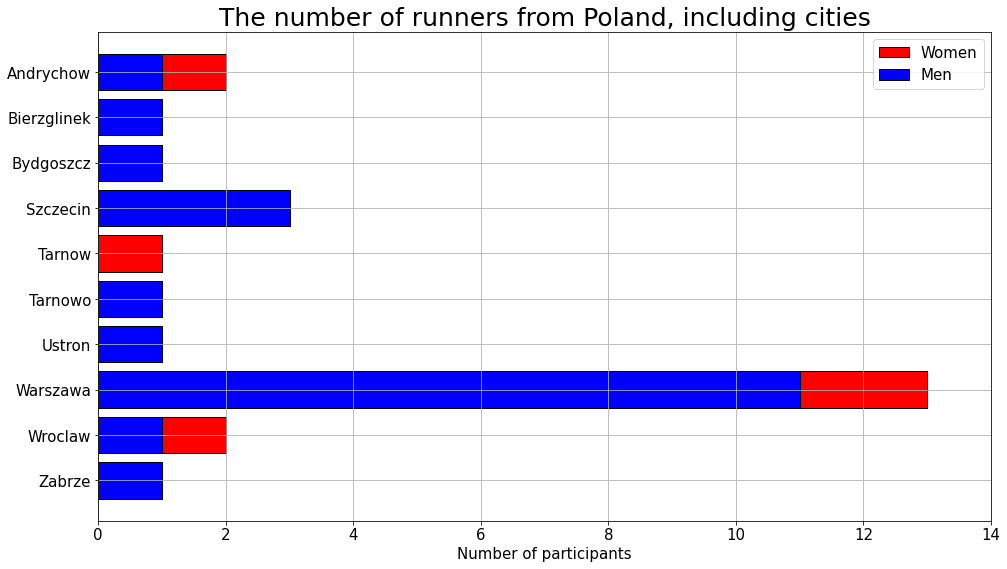

In [26]:
plt.xlim([0,14])

x = poland_how_many_people.index
y = poland_how_many_people.values

plt.title('The number of runners from Poland, including cities', fontsize=25)
plt.xlabel('Number of participants')
plt.barh(x, y, color='red', edgecolor='black')
plt.barh(poland_how_many_women.index, poland_how_many_women.values, label='Women', color='red', edgecolor='black')
plt.barh(poland_how_many_men.index, poland_how_many_men.values, label='Men', color='blue', edgecolor='black')

plt.grid()
plt.legend()
plt.show()